# 다중분류기

In [26]:
#모듈 임포트!
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [11]:
#데이터 정보 확인
iris = load_iris()
print(type(iris))
print('================data shape==================')
print('Data', iris.data.shape)
print('Label', iris.target.shape)
print('First five data : ' ,iris.data[0:5])
print('First five label : ', iris.target[0:5])
print('iris dataset keys\n', iris.keys())

<class 'sklearn.utils.Bunch'>
================data shape==================
Data (150, 4)
Label (150,)
First five data :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
First five label :  [0 0 0 0 0]
iris dataset keys
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [12]:
#target과 feature 확인
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [14]:
x = iris.data
#차원을 늘려줌, onehot인코딩을 위하여(데이터가 작아 데이터프레임을 만들지 않고 사용하기위해)
#행의 수 : -1, 열의 수 : 1
#-1이란 지정한 행동을 다 취하면 남은 것을 모두 넣으라는 의미
#즉, n개의 행과 1개의 열을 가짐
y = iris.target.reshape(-1, 1)
print(y[0:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


# 희소행렬 포현법 (sparse)

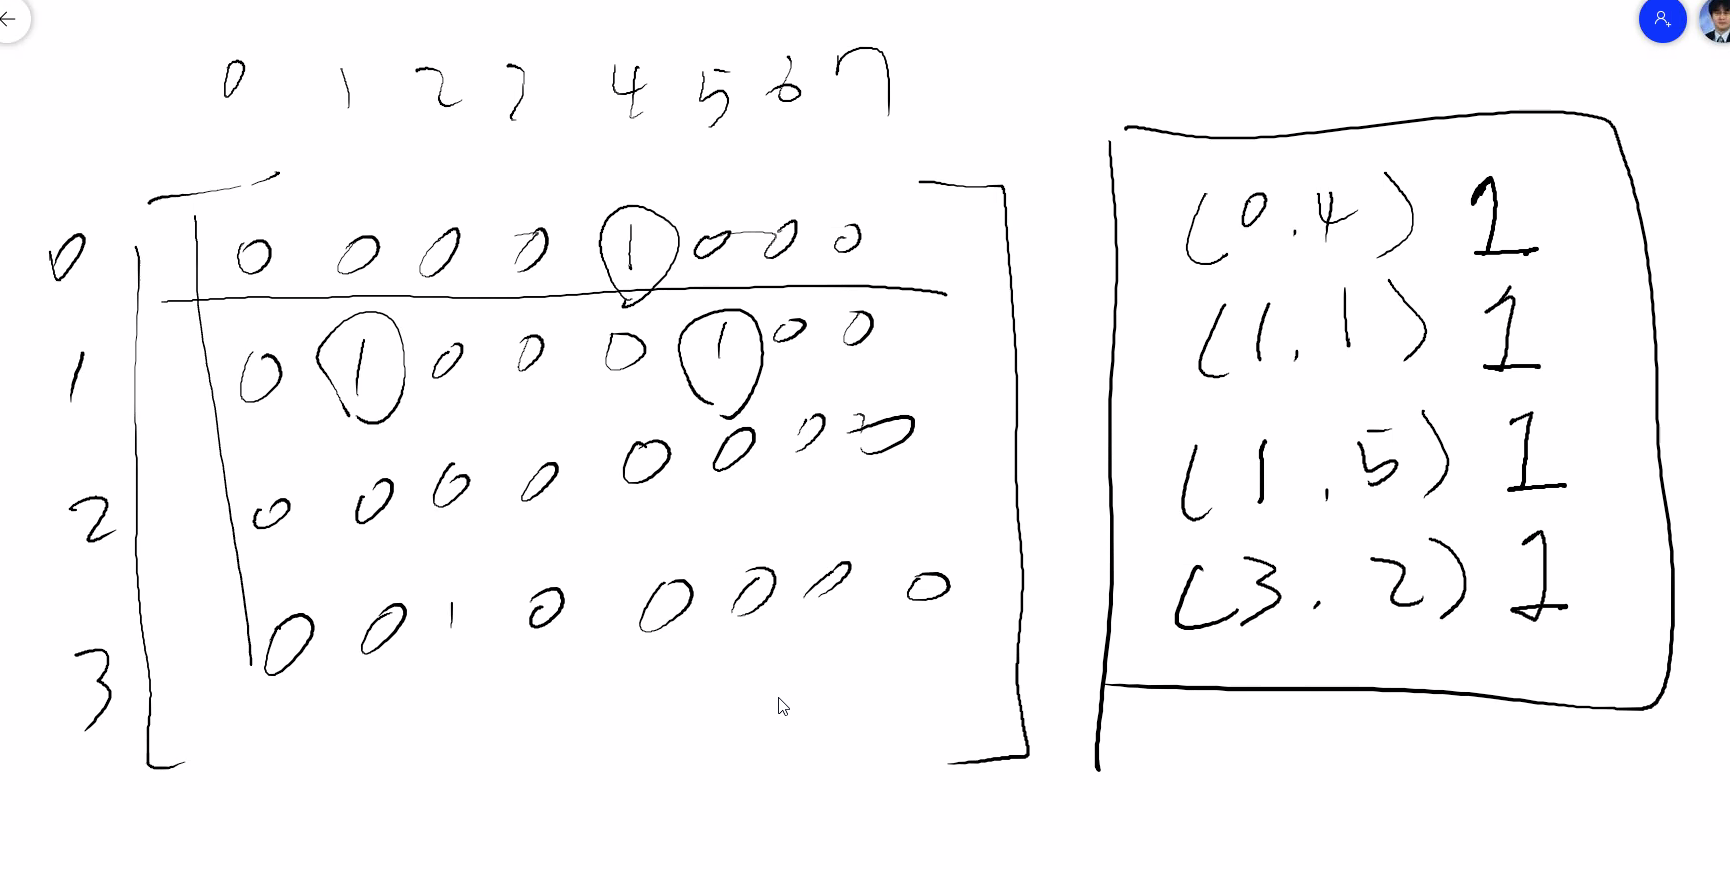

In [17]:
#sparse를 False로 주면 희소행렬 형식이 아닌 모든 리스트를 보여줌
encoder = OneHotEncoder(sparse=False)

#데이터를 숫자형으로 바꾸면 컴퓨터가 숫자 크기로 비교를 할 수 있기 때문에 원한인코딩으로 변환해줌(동일한 값 부여)
encoded_y = encoder.fit_transform(y)


print(encoded_y.shape)
print(encoded_y[:5])

(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, encoded_y, test_size = 0.2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 4) (120, 3)
(30, 4) (30, 3)


In [23]:
#모델 생성

model = Sequential()
model.add(Dense(256, input_dim = 4, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
#다중분류기에서는 분류 클래스만큼 분류기에 설정
#여기서는 3
#softmax는 확률값, 모든 값을 더하면 1
#즉, 다중분류기에서는 마지막 activation에서는 softmax를 사용
model.add(Dense(3, activation = 'softmax'))

In [27]:
opt = Adam(lr = 0.001)
#다중분류기에서는 loss로 categorical_crossentropy
model.compile(opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1539      
Total params: 101,763
Trainable params: 101,763
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
#모델 학습
fit_hist = model.fit(X_train, Y_train, batch_size = 5, epochs = 5, verbose = 1)

Epoch 1/5
24/24 [==============================] - 0s 2ms/step - loss: 0.1177 - accuracy: 0.9500
Epoch 2/5
24/24 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9333
Epoch 3/5
24/24 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9750
Epoch 4/5
24/24 [==============================] - 0s 2ms/step - loss: 0.1084 - accuracy: 0.9583
Epoch 5/5
24/24 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9250


In [31]:
#정확도 확인
score = model.evaluate(X_test, Y_test, verbose = 0)
print('Final test set accuracy : ', score[1])

Final test set accuracy :  0.9666666388511658


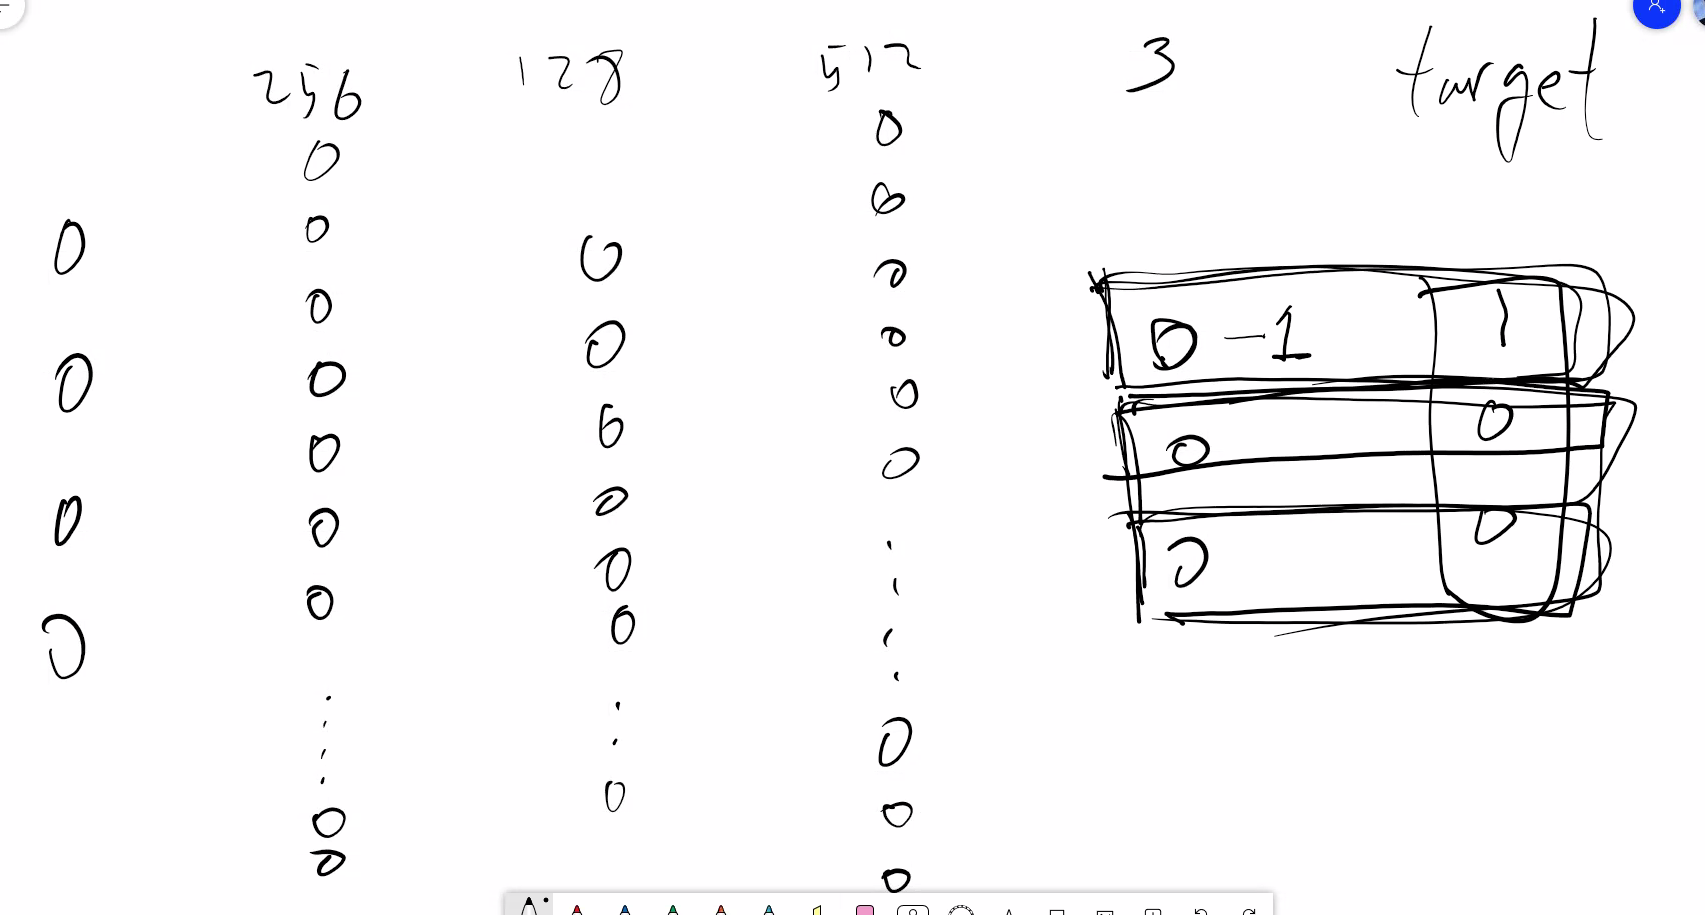

다중분류기는 하나의 이진분류기가 여러개 모여있는 것.
최종분류기 전의 Desne는 모두가 공유하고 최종 분류 단계에서만 이중분류기로 분류한다고 보면 된다.

3과 target은 1인지 아닌지 확률을 구하는 것 --> 하나 하나 개별로 이진분류기로 봄 --> 클래스가 3개면 이진분류기 3개를 이어붙인 것처럼 된다. (다중분류기)

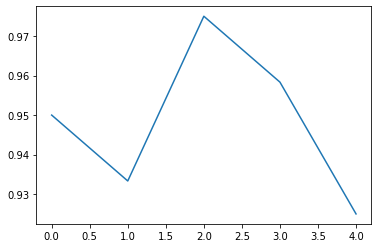

In [32]:
#시각화

plt.plot(fit_hist.history['accuracy'])
plt.show()

In [69]:
labels = iris.target_names
my_sample = np.random.randint(30)

sample = X_test[my_sample]

#차원을 늘린다
#1개의 리스트를 4개의 열을 가진 리스트를 만들기 위해 차원 추가를 함
sample = sample.reshape(1, 4)

pred = model.predict(sample)

print(pred)
print(Y_test[my_sample])
print('Target : ', labels[np.argmax(Y_test[my_sample])])
print('Rrediction after learning is : ', labels[np.argmax(pred)])

[[8.7246316e-04 9.9596679e-01 3.1607731e-03]]
[0. 1. 0.]
Target :  versicolor
Rrediction after learning is :  versicolor


# 차원 추가를 하는 이유

위의 리스트는 1차원 리스트여서 값을 뽑아내면 값이 하나씩 나옴
하지만 feature가 4개이기 때문에 값이 4개가 필요, 따라서 차원을 추가하여 데이터를 뽑을 때 4개씩 추출할 수 있도록 차원을 확장해준다

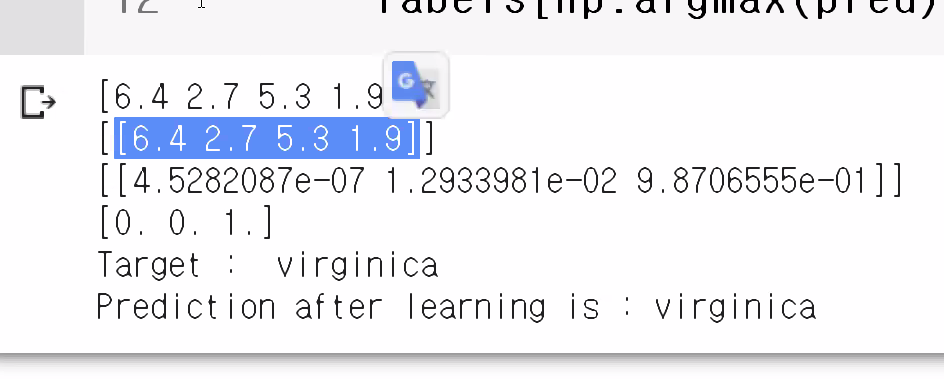